In [1]:
# Importar dependências
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

pd.set_option('precision', 2)

# Criando o objeto modelo e variável para indicar a pasta com os dados
data_path = '../../../input/Santos_Basin/Lake_PreSal_Santos_Basin/v2/'
geo_model = gp.create_model('LakePreSal_V2')

Not subsurface compatibility available


WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
# Inicializando os dados, a extensão e a resolução do modelo.
gp.init_data(geo_model,
             extent=[0, 4000, 0, 12000, -600, 100],
             resolution=[100, 100, 100],
             path_i=data_path + "surfaces_points.csv",
             path_o=data_path + "orientations_points.csv")

Active grids: ['regular']


LakePreSal_V2  2023-05-22 15:51

In [3]:
geo_model.surfaces

,surface,series,order_surfaces,color,id
0,ARIRI,Default series,1,#015482,1
1,UBV,Default series,2,#9f0052,2
2,LBV,Default series,3,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [4]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 1
gp.map_stack_to_surfaces(geo_model,                         
                         {"Ariri_series": ('ARIRI'),
                          "UBV_series": ('UBV'),
                          "Basement": ('LBV')})

# Ver o grid do modelo
geo_model.grid

Grid Object. Values: 
array([[   20. ,    60. ,  -596.5],
       [   20. ,    60. ,  -589.5],
       [   20. ,    60. ,  -582.5],
       ...,
       [ 3980. , 11940. ,    82.5],
       [ 3980. , 11940. ,    89.5],
       [ 3980. , 11940. ,    96.5]])

In [ ]:
geo_model.surfaces

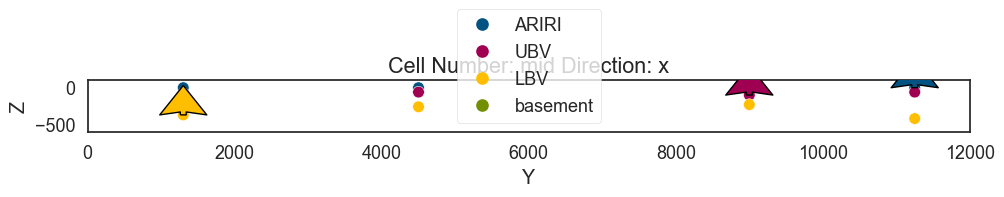

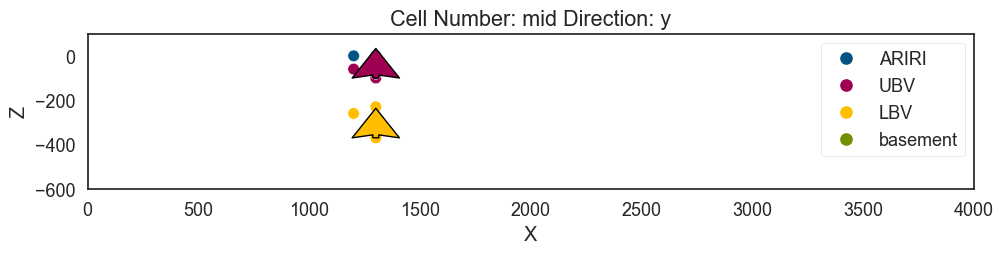

In [5]:
# Ver em 2D os dados nas 3 direções
gp.plot_2d(geo_model, direction=['x'], show_data=True)

gp.plot_2d(geo_model, direction=['y'], show_data=True)

#gp.plot_2d(geo_model, direction=['z'], show_data=True)

In [ ]:
geo_model.stack

In [6]:
# Ver os dados em 3D
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=True)

In [ ]:
# Adicionar uma topografia randômica 
geo_model.set_topography(source='random')
gp.plot_2d(geo_model, show_topography=True, section_names=['topography'])
plt.show() 

In [7]:
%%time
# Interpolador
gp.set_interpolator(geo_model,
                    theano_optimizer='fast_run',
                    compile_theano=True
                    )

Setting kriging parameters to their default values.
Compiling theano function...
Level of Optimization:  fast_run
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                      values
range              12668.46
$C_o$            3821190.48
drift equations   [3, 3, 3]
Wall time: 13.5 s


In [8]:
%%time
# Computar a solução do modelo
sol = gp.compute_model(geo_model, compute_mesh=True)

Wall time: 3.26 s


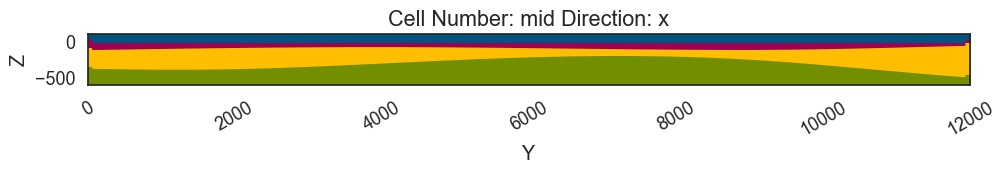

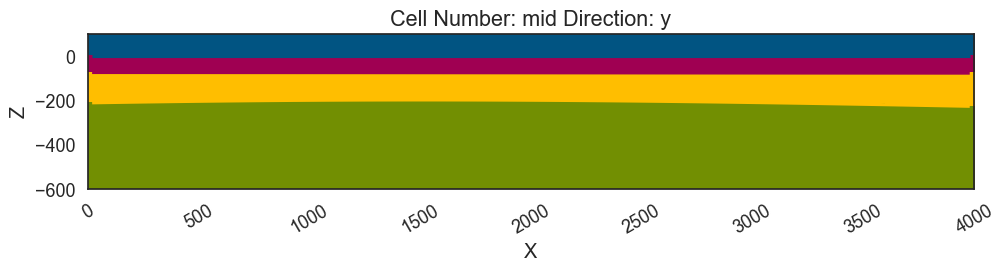

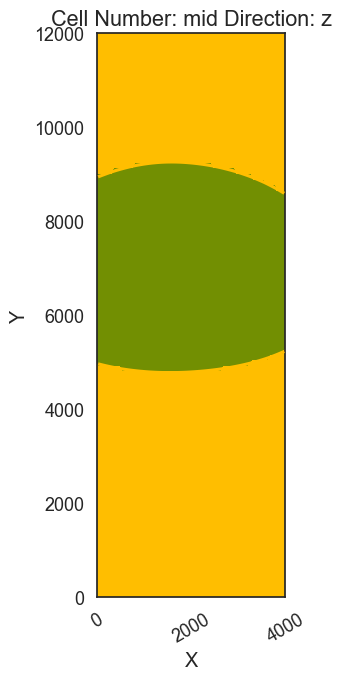

In [9]:
# Seção transversal do modelo
gp.plot_2d(geo_model, direction="x", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="y", show_data=False, show_lith=True)
gp.plot_2d(geo_model, direction="z", show_data=False, show_lith=True)

In [10]:
# Visualizar o modelo em 3D
ver, sim = gp.get_surfaces(geo_model)
gpv = gp.plot_3d(geo_model, image=False, plotter_type='basic', show_data=False)

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(geo_model)